<a href="https://colab.research.google.com/github/xhartonx/Financial_Fraud_Detection/blob/main/BUDT704_Credit_Card_Fraud_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUDT 704 Credit Card Fraud Report

## 1. How can we detect credit card fraud?

<p>In 2022, 65% of credit cardholders were victims of credit card fraud. As reliance of digit pay methods continue to grow, credit card fraud will continue to rise. To combat this issue, credit card fraud needs to be studied so it can be prevented more commonly. We want to build a model that can take a customer's transaction data and accurately classify them as fraudulent or normal activity.

We will be using a labeled dataset from Kaggle as our basis. The link for the dataset can be found <a href="https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
">here</a>. The dataset itself consists of the following parts:

id: Unique identifier for each transaction
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
Amount: The transaction amount
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

As shown above, most attributes of the credit card transactions are anonymized, meaning that we cannot draw any conclusions about what features indicate credit card fraud the most. The best we can do is report to credit card companies which anonymized features are the most important and show the accuracy of our model. Thus, the goal is to present our best performing model as a product to credit card companies to aid them in detecting fraud.<p>

## 2. The Dataset and Preprocessing

<p>We want to import the dataset and perform some data validation to ensure the validity and accuracy of our report. After loading in the dataset, we want to check for certain aspects of the data. Some of these aspects include:

1. Loading in the data and checking for correct columns.
2. Checking for null values or duplicate rows.
3. Checking the class distribution to make sure there is substantial data for each.
<p>


In [ ]:
# Loading in required packages


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Reading in the dataset
df = pd.read_csv('creditcard_2023.csv')

In [ ]:
# Preview of the dataset
df.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# Showing summary statistics of each of the features
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
# Validating the dataset by detecting null values
df.isnull().sum().max()

0

In [ ]:
# Displaying the column names
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Displaying the distribution of labels in the dataset
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


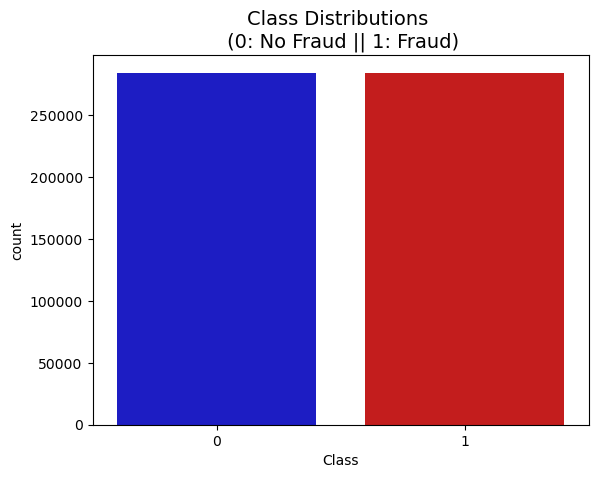

In [ ]:
# Plotting the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [ ]:
# Checking for duplicate rows
duplicate = df[df.duplicated()]
if duplicate.empty:
    print("Duplicate rows do not exist")
else:
    print("Duplicate rows found: \n {} ".format(duplicate))

Duplicate rows do not exist


In [ ]:
# Looking for constant faetures
from sklearn.feature_selection import VarianceThreshold

X = df.drop(['id','Class'], axis=1)
y = df['Class']
vth = VarianceThreshold(threshold=0)
vth.fit(X)
print(vth.get_support())

constent_features = [
        feat for feat in X.columns if X[feat].std() == 0
    ]

print("Constant Features are : {} ".format(constent_features))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Constant Features are : [] 


## 3. Model Building

<p>After preprocessing the data, its now time to build out some models. We first want to split the data into a training and test set. The purpose of this is to have a set of data to test the accuracy of the model on. We need to split the dataset before building the model because we do not want the model to be trained on any of the test set. We do this because if we build the model on the entire dataset and test on a portion of it, the test set would not be completely independent from the building stages of the model, completely compromising our results and giving a false boost to the test accuracy.

We then train 4 K-nearest neighbors classifiers on the training set. As a refresher, the KNN classifier classifies points based on the k-closest points distancewise.

The other model we are building out is a decision tree classifier which splits up the prediction space and classifies all points on either side of the split the same. Each split is called a branch, and each side of the branch is called a node. We use grid seach cross validation to find the optimal model.

We also build ridge and lasso regression models to help with feature selection.
<p>

In [ ]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running KNN Classifier with different values of K

# K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
ypred5 = knn5.predict(X_test.values)
print("Accuracy with k=5", accuracy_score(ypred5, y_test))

# K=10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train,y_train)
ypred10 = knn10.predict(X_test.values)
print("Accuracy with k=10", accuracy_score(ypred10, y_test))
# K=20
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train,y_train)
ypred20 = knn20.predict(X_test.values)
print("Accuracy with k=20", accuracy_score(ypred20, y_test))

# K=100
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train,y_train)
ypred = knn100.predict(X_test.values)
print("Accuracy with k=100", accuracy_score(ypred, y_test))

Accuracy with k=5 0.9349489122979794
Accuracy with k=10 0.9286999747932164
Accuracy with k=20 0.9188165708222688
Accuracy with k=100 0.8551840974505976


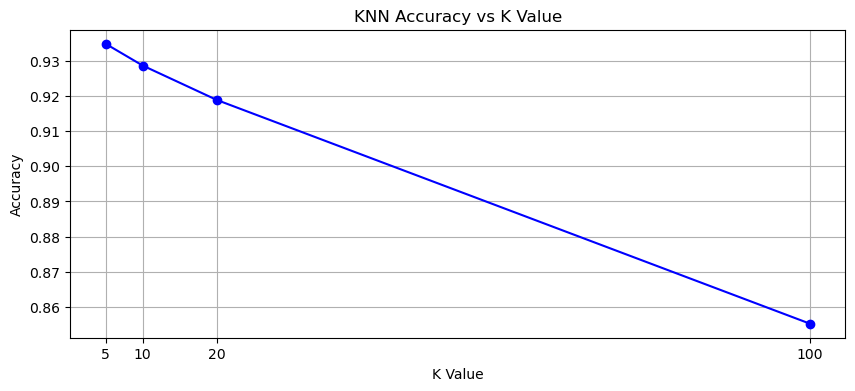

In [ ]:
# Plotting KNN

import matplotlib.pyplot as plt
import numpy as np

# KNN Accuracies
k_values = [5, 10, 20, 100]
knn_accuracies = [0.9349, 0.9287, 0.9189, 0.8552]

# Plotting KNN Accuracies
plt.figure(figsize=(10, 4))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Building the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dt = DecisionTreeClassifier()

# Defining the parameter grid to parse through for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Determining the best model using GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)
tree_pred = grid_search.predict(X_test.values)

# Printing out the best model and scores
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(accuracy_score(tree_pred,y_test))

DecisionTreeClassifier(criterion='entropy')
0.997686169295331
0.9983703521329043


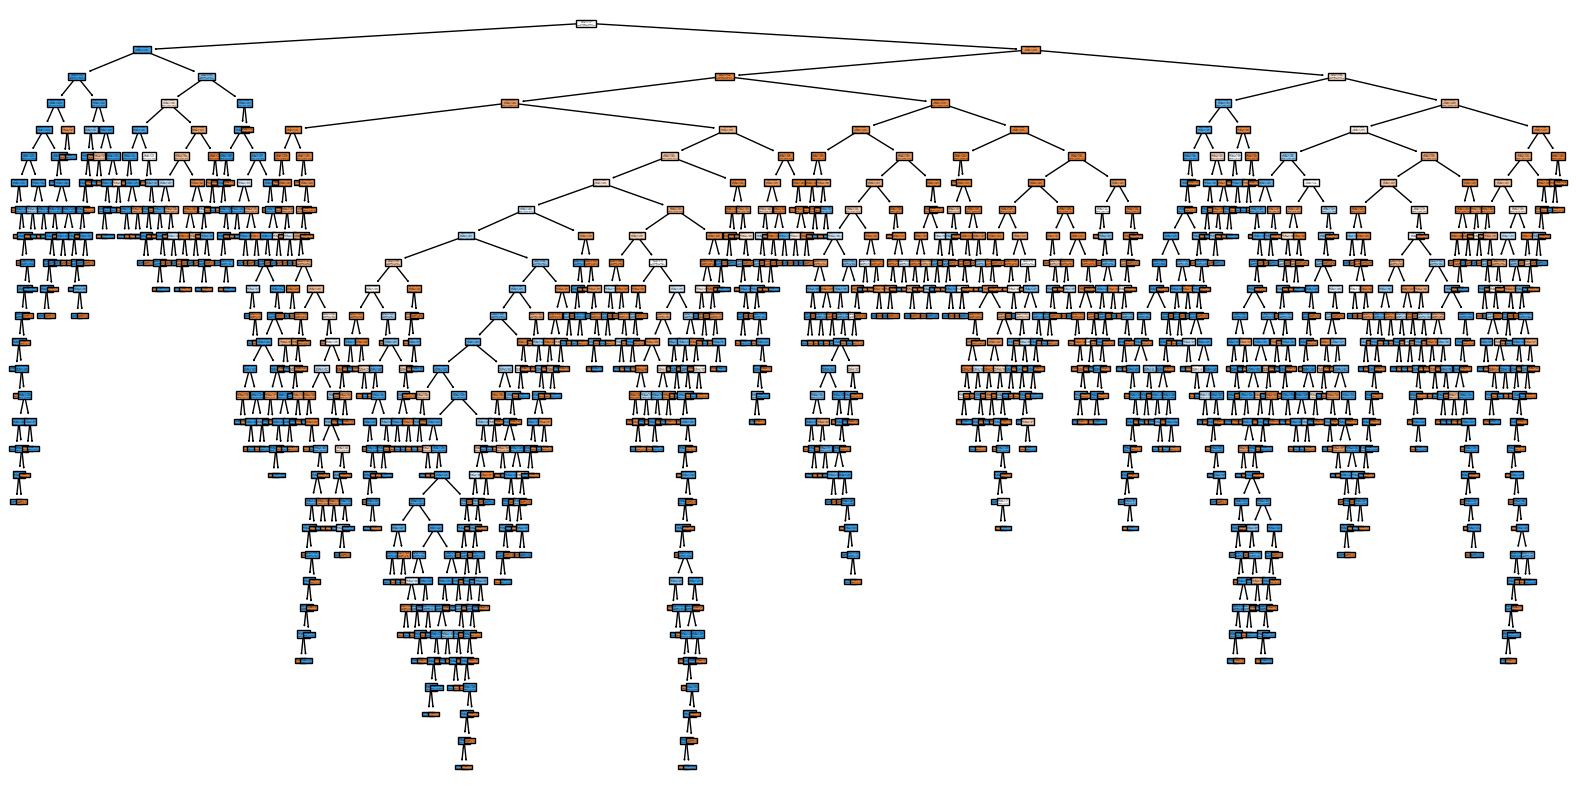

In [ ]:
#Plotting the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True)

plt.show()

In [ ]:
# Printing the classification report
accuracy = accuracy_score(y_test, tree_pred)
print(f"The Accuracy of the model is : {accuracy * 100:.2f}% for the test data")
print(classification_report(y_test, tree_pred))

The Accuracy of the model is : 99.84% for the test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85510
           1       1.00      1.00      1.00     85079

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



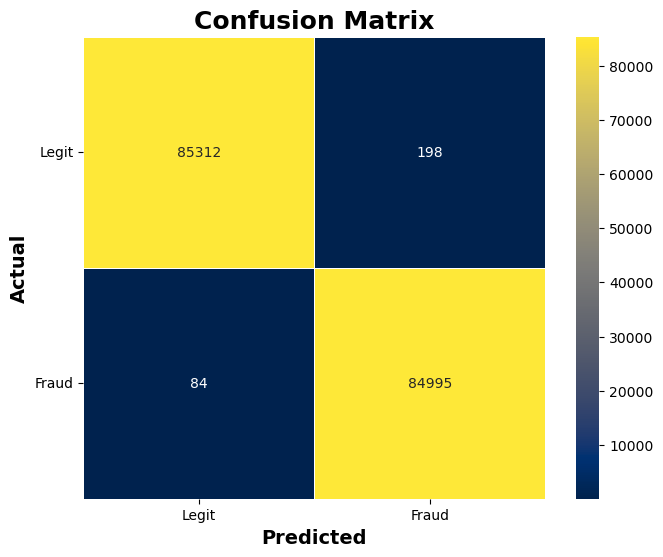

In [ ]:
#plotting Confusion Matrix
matrix = confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(
    matrix, annot=True, fmt='d', cmap='cividis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Legit", "Fraud"],
    yticklabels=["Legit", "Fraud"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

## 4. Results

<p> Here we see we have an extremely accurate model with very few incorrectly classified points. The goal is to minimize fraudulent transactions classified as normal, and minimize normal transactions classified as fraudulent.

Both of these outcomes can be detrimental to both consumers and the company, but the outcome that is far worse is to not recognize fraudulent transactions rather than call regular ones fraudulent. The next step would be to shift the models to predict more as fraudulent, and tell credit card companies to contact consumers in these cases to confirm transactions of fraudulent.
<p>

In [ ]:
#finding feature importances
best_dt = grid_search.best_estimator_
# Get the feature importances from the best estimator
feature_importances = best_dt.feature_importances_
print("Feature importances:", feature_importances)

Feature importances: [1.30020165e-02 1.11761087e-02 1.63872719e-02 7.89131976e-02
 8.46092540e-03 4.21543939e-03 9.53826658e-03 1.77630087e-02
 6.12417366e-03 3.07778822e-02 5.64001721e-03 1.14158886e-02
 1.08631377e-02 7.06245002e-01 3.12949545e-03 6.44169593e-03
 8.00926689e-03 6.50215253e-03 4.84719160e-03 1.69245304e-03
 5.54096177e-03 1.59362914e-03 6.99887304e-03 2.59382455e-03
 6.73736238e-03 6.71932192e-03 3.08394990e-03 5.52597163e-03
 6.15136894e-05]


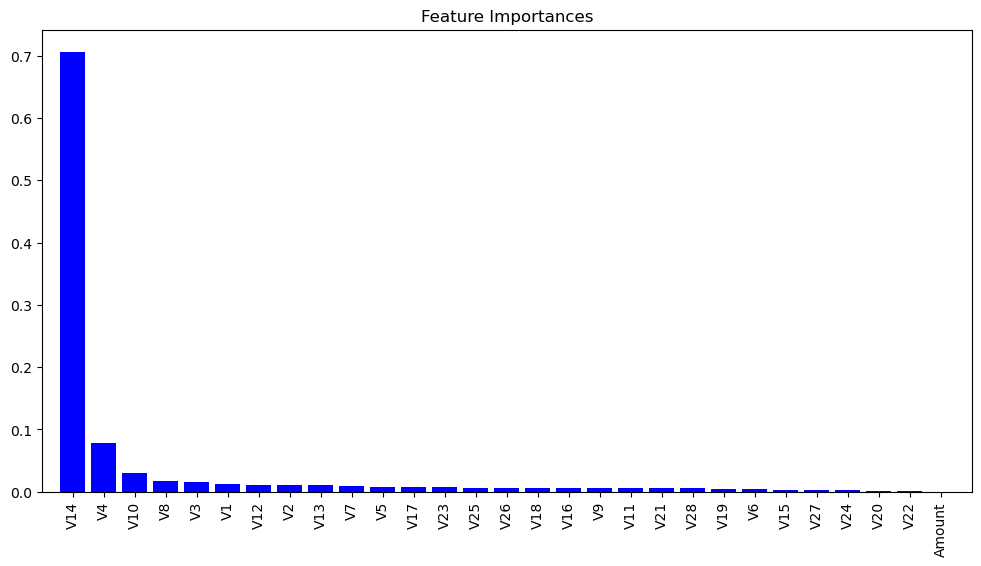

In [ ]:
#plotting feature importances
remove_item = ['id', 'class']
feature_names= [name for name in df.columns if name not in remove_item ]

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Training ridge and lasso regression models
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


ridge_model = Ridge()
lasso_model = Lasso()

ridge_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

ridge_grid = GridSearchCV(ridge_model, ridge_grid, cv=5)
lasso_grid = GridSearchCV(lasso_model, lasso_grid, cv=5)

ridge_grid.fit(X_train,y_train)
lasso_grid.fit(X_train,y_train)

ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)

print('ridge: ', ridge_grid.best_params_)
print('ridge: ', ridge_grid.best_score_)
print('lasso: ', lasso_grid.best_params_)
print('lasso: ', lasso_grid.best_score_)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)


ridge:  {'alpha': 10.0}
ridge:  0.7630142955365005
lasso:  {'alpha': 0.1}
lasso:  0.6773370236188566


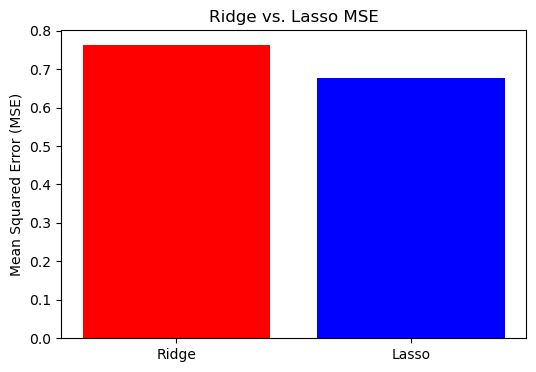

In [ ]:
# Plotting bar chart for Ridge and Lasso
models = ['Ridge', 'Lasso']
mses = [ridge_mse, lasso_mse]
plt.figure(figsize=(6, 4))
plt.bar(models, mses, color=['red', 'blue'])
plt.title('Ridge vs. Lasso MSE')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()